## Example notebook for running a single parameter sweep with EBS

Created by Sarah Steiger

This notebook highlights how to run a single parameter sweep using EBS given the sample `parameters.yml` file and WFE, WFS&C and coronagraph sensitivity csv fies included in the package `inputs` folder.

### Import packages

In [36]:
import os
import yaml
import numpy as np
from ebs.error_budget import ErrorBudget
from ebs.parameter_sweep import ParameterSweep
from ebs.visualization import plot_ebs_output
import ebs
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

### Run Sweep

In [37]:
# Create ErrorBudget object with the parameters in the config.
package_path = Path(ebs.__file__)
root_dir = package_path.parent.parent

config_file = os.path.join(root_dir, "inputs/parameters.yml")

with open(config_file, 'r') as file:
    data = yaml.safe_load(file)

# Update paths to point to sample inputs, output, and temporary folder
data["paths"]["output"] = os.path.join(root_dir, "output")
data["paths"]["input"] = os.path.join(root_dir, "inputs")
data["paths"]["temporary"] = os.path.join(root_dir, "temp")

# To overwrite the original file
with open(config_file, 'w') as file:
    yaml.dump(data, file)

eb = ErrorBudget(config_file)

In [38]:
# Define parameter and values to sweep over.
parameter = ("contrast", None) # or e.g. ("scienceInstruments", "idark")
values = list(1/10**np.arange(7, 13, 0.1)) # uniform sampling in log space

In [39]:
%%capture
# Remove the above if you want to see the EXOSIMS logging messages.

# Load the config.
with open(config_file, 'r') as config:
    config = yaml.load(config, Loader=yaml.FullLoader)

# Run the parameter sweep using the ParameterSweep class.
ps = ParameterSweep(config, parameter=parameter, values=values, error_budget=eb)
result_dict, error_budget = ps.run_sweep()

Initializing parameters for EXOSIMS
Running sweep on contrast
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing parameters for EXOSIMS
Running EXOSIMS to calculate integration times.
Initializing p

### Plot Results

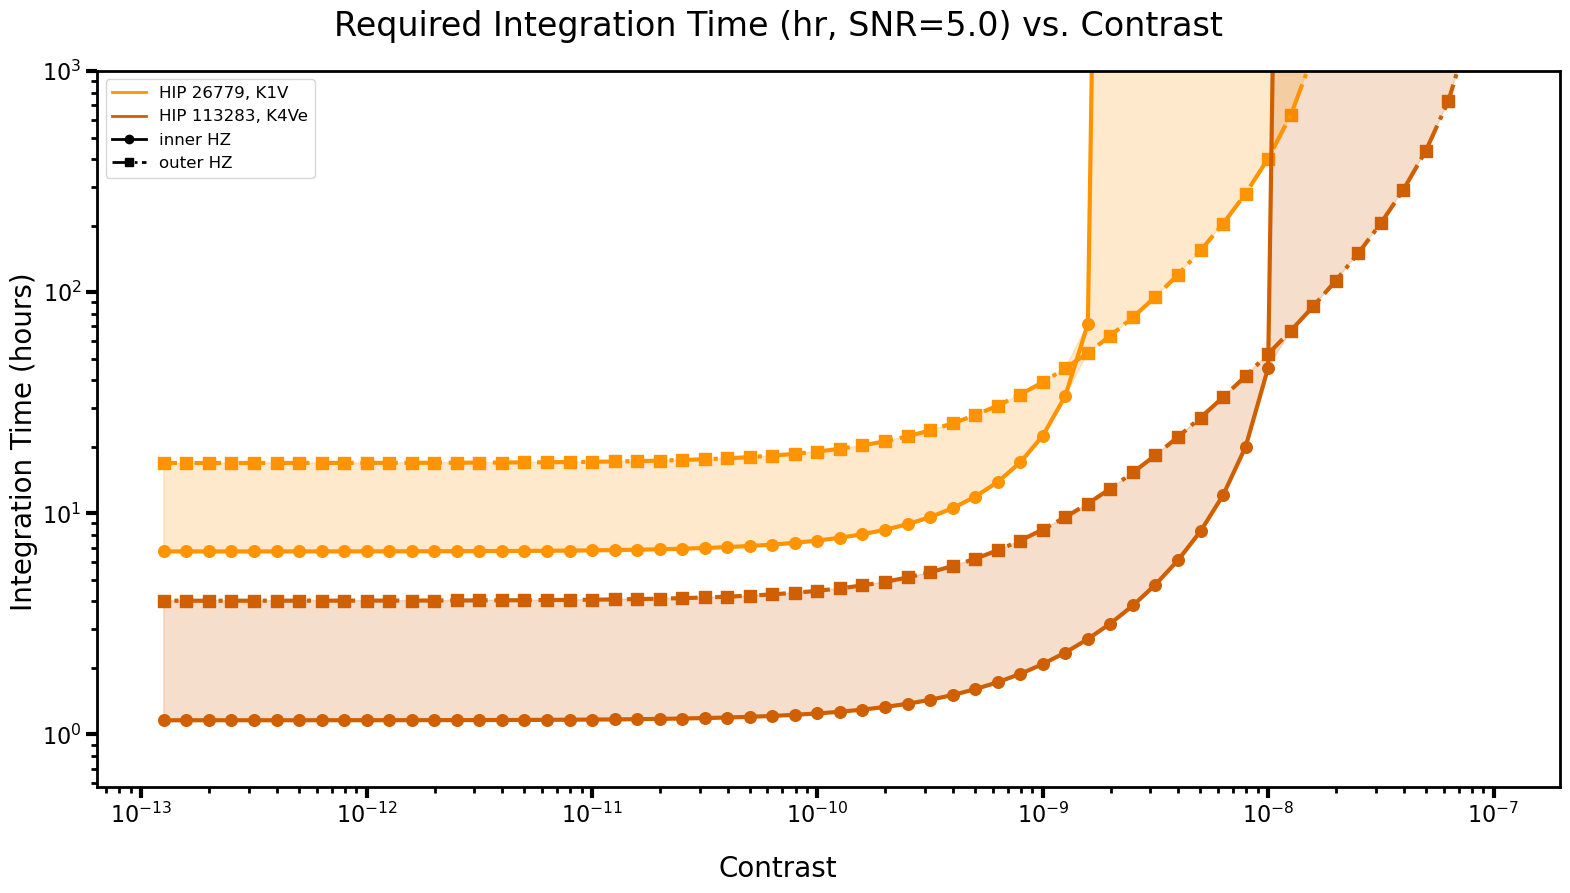

In [40]:
# Create a dictionary of target stars and spectral types for the plot.
spectral_dict = {}
for i, star in enumerate(config['targets']):
    spectral_dict[config['targets'][star]['HIP']] \
        = config['targets'][star]['spec_type']

# Plot the outputs using specified key words in the config.
plot_ebs_output(error_budget,
                spectral_dict,
                parameter[0],
                values,
                result_dict['int_time'],
                force_linear=config['plotting']['force_linear'],
                plot_stars=config["plotting"]["plot_stars"],
                fill=config["plotting"]["fill"],
                plot_by_spectype=config["plotting"]["plot_by_spectype"],
                save_name='my_sweep.pdf')